<a href="https://colab.research.google.com/github/Karthika1915/certificateverification/blob/main/transforms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone "https://github.com/Gurupatil0003/Waste-Mangement-Dataset"

Cloning into 'Waste-Mangement-Dataset'...
remote: Enumerating objects: 2558, done.
remote: Counting objects: 100% (2558/2558), done.
remote: Compressing objects: 100% (2557/2557), done.
remote: Total 2558 (delta 4), reused 2543 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (2558/2558), 40.85 MiB | 23.70 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
import torch,timm
import torch.nn as nn
from torchvision import datasets,transforms
from torch.utils.data import DataLoader

In [ ]:
train_path="/content/Waste-Mangement-Dataset/Data/Train"
test_path="/content/Waste-Mangement-Dataset/Data/Test"
SIZE,BATCH,EPOCHS,LR=224,16,1,3e-4

In [ ]:
T=transforms.Compose([
    transforms.Resize((SIZE,SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
train=datasets.ImageFolder(train_path,transform=T)
test=datasets.ImageFolder(test_path,transform=T)
train_loader=DataLoader(train,BATCH,shuffle=True,num_workers=2,pin_memory=True)
test_loader=DataLoader(test,BATCH,num_workers=2,pin_memory=True)

In [ ]:
names=train.classes
names


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

cpu and cuda is nothing but GPU

In [ ]:
device=torch.device("cuda"if torch.cuda.is_available()else"cpu")
device

device(type='cuda')

In [ ]:
model=timm.create_model("vit_tiny_patch16_224",True)
model.head=nn.Linear(model.head.in_features,len(names))
model=model.to(device)
g_opt=torch.optim.Adam(model.parameters(),lr=LR)
loss=nn.CrossEntropyLoss()
for _ in range(EPOCHS):
  for x,y in train_loader:
    x,y =x.to(device),y.to(device)
    g_opt.zero_grad()
    loss(model(x),y).backward()
    g_opt.step()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

glass


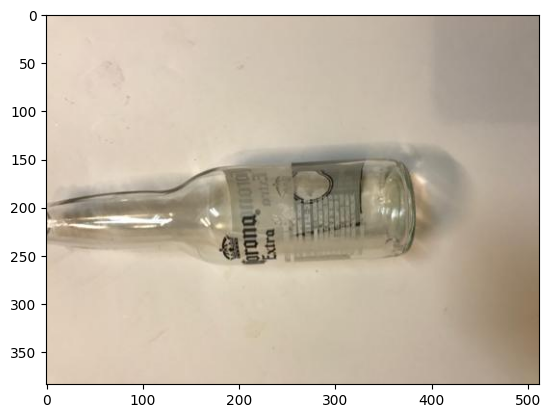

In [ ]:
from PIL import Image
inp=Image.open("/content/Waste-Mangement-Dataset/Data/Test/glass/glass500.jpg").convert("RGB")
img=T(inp).unsqueeze(0).to(device)
pred=model(img).argmax(1).item()
print(names[pred])
import matplotlib.pyplot as plt
plt.imshow(inp)